# Modeling Notebook

## 1st Model - 0.5 correlation or higher

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.metrics as metrics

sns.set_style('darkgrid')

In [268]:
import warnings
warnings.filterwarnings("ignore")  

# code from https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

In [269]:
train_df1 = pd.read_csv('./datasets/clean_train.csv')
test_df1 = pd.read_csv('./datasets/clean_test.csv')

In [270]:
pd.set_option('display.max_columns', 101)

In [271]:
train_df1.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y
0,109,533352170,60,RL,68.0,13517,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,1976.0,2.0,475.0,TA,3,0,44,0,0,0,0,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,1997.0,2.0,559.0,TA,3,0,74,0,0,0,0,0,4,2009,WD,220000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1953.0,1.0,246.0,TA,3,0,52,0,0,0,0,0,1,2010,WD,109000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,318,916386060,60,RL,73.0,9802,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,2007.0,2.0,400.0,TA,3,100,0,0,0,0,0,0,4,2010,WD,174000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,1957.0,2.0,484.0,TA,3,0,59,0,0,0,0,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


<Figure size 576x576 with 0 Axes>

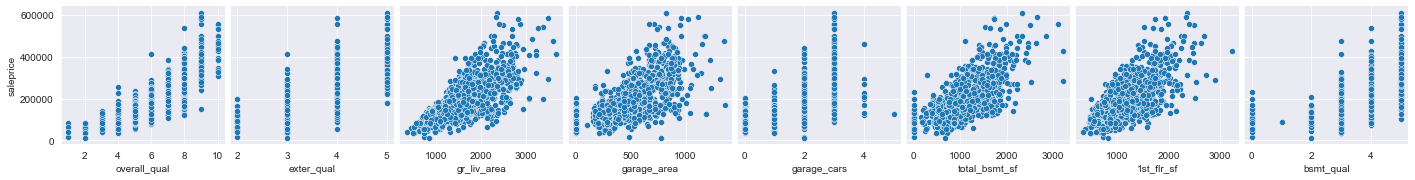

In [272]:
plt.figure(figsize=(8,8))
sns.pairplot(train_df1, x_vars=['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 
                                'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual'], 
            y_vars=['saleprice'])

<Figure size 576x576 with 0 Axes>

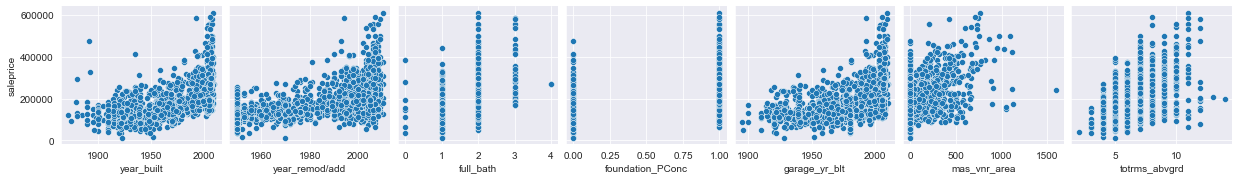

In [273]:
plt.figure(figsize=(8,8))
sns.pairplot(train_df1, x_vars=['year_built', 'year_remod/add', 'full_bath', 'foundation_PConc', 'garage_yr_blt', 
                                'mas_vnr_area', 'totrms_abvgrd'], 
            y_vars=['saleprice'])

In [274]:
features1 = ['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 
            'bsmt_qual', 'year_built', 'year_remod/add', 'full_bath', 'foundation_PConc', 'garage_yr_blt', 
            'mas_vnr_area', 'totrms_abvgrd']
X1 = train_df1[features1]
y1 = train_df1['saleprice']

In [275]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [276]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

LinearRegression()

In [277]:
cross_val_score(lr1, X1_train, y1_train).mean()

0.8473926197138605

In [278]:
lr1.score(X1_train, y1_train)

0.8528540046733675

In [279]:
lr1.score(X1_test, y1_test)

0.8424070555128857

In [280]:
preds1 = lr1.predict(X1_test)

In [281]:
residuals1 = y1_test - preds1

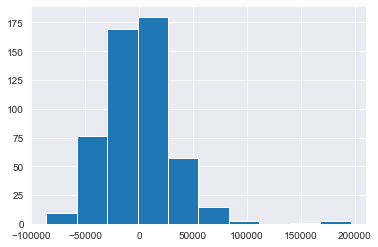

In [282]:
plt.hist(residuals1);

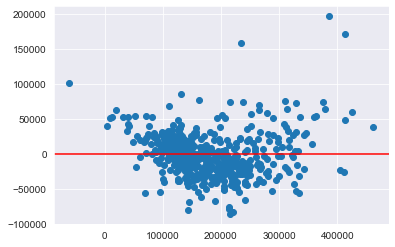

In [283]:
plt.scatter(preds1, residuals1)
plt.axhline(0, color='r');

In [284]:
kaggle_preds1 = lr1.predict(test_df1[features1])

In [285]:
test_df1['saleprice'] = kaggle_preds1

In [286]:
test_df1.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,1910.0,1,440,Po,1,0,60,112,0,0,0,0,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,155231.651924
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,1977.0,2,580,TA,3,170,0,0,0,0,0,0,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,214976.794411


In [287]:
kaggle1 = test_df1[['id', 'saleprice']]

In [288]:
kaggle1.to_csv('./datasets/kaggle1_sub.csv', index=False)

**Will use this model as my baseline and look to improve**

---

## 2nd Model - all numeric data

In [289]:
features2 = [c for c in train_df1._get_numeric_data().columns if c not in ['saleprice', 'id', 'pid']]  # <- code from model workflow lecture
X2 = train_df1[features2]
y2 = train_df1['saleprice']

In [290]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [291]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [292]:
cross_val_score(lr2, X2_train, y2_train).mean()

0.8796554082252215

In [293]:
lr2.score(X2_train, y2_train)

0.8980352925324456

In [294]:
lr2.score(X2_test, y2_test)

0.8778861349343574

In [295]:
preds2 = lr2.predict(X2_test)

In [296]:
residuals2 = y2_test - preds2

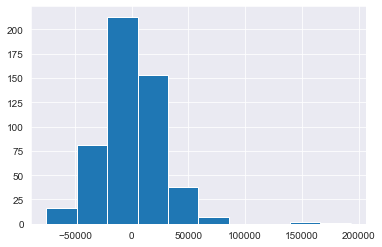

In [297]:
plt.hist(residuals2);

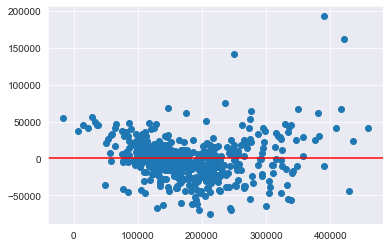

In [298]:
plt.scatter(preds2, residuals2)
plt.axhline(0, color='r');

In [299]:
kaggle_preds2 = lr2.predict(test_df1[features2])

In [300]:
test_df1['saleprice'] = kaggle_preds2

In [301]:
test_df1.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,1910.0,1,440,Po,1,0,60,112,0,0,0,0,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,163285.401910
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,1977.0,2,580,TA,3,170,0,0,0,0,0,0,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,155350.336816


In [302]:
kaggle2 = test_df1[['id', 'saleprice']]

In [303]:
kaggle2.to_csv('./datasets/kaggle2_sub.csv', index=False)

**Beat my original baseline model in kaggle.  Cross-val score increased by 3%**

---

## 3rd Model - all numeric data scaled

In [304]:
features3 = [c for c in train_df1._get_numeric_data().columns if c not in ['saleprice', 'id', 'pid']]
X3 = train_df1[features3]
y3 = train_df1['saleprice']

In [305]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [306]:
ss = StandardScaler()

In [307]:
ss.fit(X3_train)
X3_train_sc = ss.transform(X3_train)
X3_test_sc = ss.transform(X3_test)

In [308]:
lr3 = LinearRegression()
lr3.fit(X3_train_sc, y3_train)

LinearRegression()

In [309]:
cross_val_score(lr3, X3_train_sc, y3_train).mean()

0.879632130329016

In [310]:
lr3.score(X3_train_sc, y3_train)

0.8980347880488155

In [311]:
lr3.score(X3_test_sc, y3_test)

0.8778901910904852

In [312]:
preds3 = lr3.predict(X3_test_sc)

In [313]:
residuals3 = y3_test - preds3

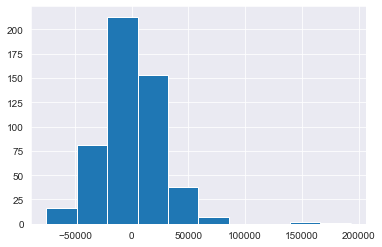

In [314]:
plt.hist(residuals3);

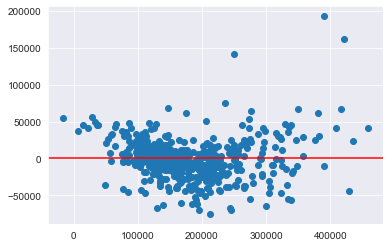

In [315]:
plt.scatter(preds3, residuals3)
plt.axhline(0, color='r');

In [316]:
test3_features = ss.transform(test_df1[features3])
kaggle_preds3 = lr3.predict(test3_features)

In [317]:
test_df1['saleprice'] = kaggle_preds3

In [318]:
test_df1.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,1910.0,1,440,Po,1,0,60,112,0,0,0,0,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,163236.000512
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,1977.0,2,580,TA,3,170,0,0,0,0,0,0,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,155334.904051


In [319]:
kaggle3 = test_df1[['id', 'saleprice']]

In [320]:
kaggle3.to_csv('./datasets/kaggle3_sub.csv', index=False)

**Slightly lower cross-val score than model 2**

---

## 4th model - including feature interactions

In [321]:
train_df2 = pd.read_csv('./datasets/clean_train_with_features.csv')
test_df2 = pd.read_csv('./datasets/clean_test_with_features.csv')

In [322]:
features4 = [c for c in train_df2._get_numeric_data().columns if c not in ['saleprice', 'id', 'pid']]
X4 = train_df2[features4]
y4 = train_df2['saleprice']

In [323]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

In [324]:
lr4 = LinearRegression()
lr4.fit(X4_train, y4_train)

LinearRegression()

In [325]:
cross_val_score(lr4, X4_train, y4_train).mean()

0.9023018602718487

In [326]:
lr4.score(X4_train, y4_train)

0.9215277724552197

In [327]:
lr4.score(X4_test, y4_test)

0.901527454519773

In [328]:
preds4 = lr4.predict(X4_test)

In [329]:
residuals4 = y4_test - preds4

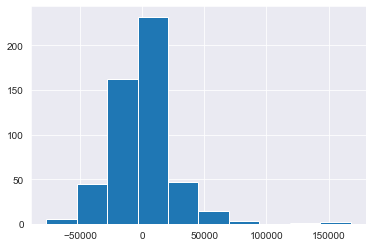

In [330]:
plt.hist(residuals4);

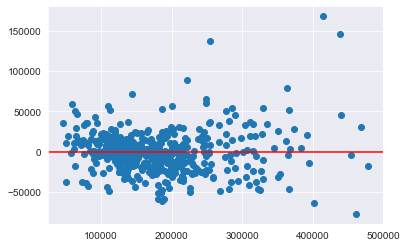

In [331]:
plt.scatter(preds4, residuals4)
plt.axhline(0, color='r');

In [332]:
kaggle_preds4 = lr4.predict(test_df2[features4])

In [333]:
test_df2['saleprice'] = kaggle_preds4

In [334]:
test_df2.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,...,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,overall_exter_qual,overall_bsmt_qual,exter_bsmt_qual,overall_qual_squared,exter_qual_squared,bsmt_qual_squared,garage_exter_cond,garage_overall_cond,exter_overall_cond,garage_cond_squared,exter_cond_squared,overall_cond_squared,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,...,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,18,12,6,36,9,4,2,8,16,1,4,64,126155.258146
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,...,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,15,20,12,25,9,16,9,12,12,9,9,16,155233.800045


In [335]:
kaggle4 = test_df2[['id', 'saleprice']]

In [336]:
kaggle4.to_csv('./datasets/kaggle4_sub.csv', index=False)

**Best kaggle score so far.  Cross-val score improved by 3%**

---

## 5th model - Lasso

In [337]:
features5 = [c for c in train_df2._get_numeric_data().columns if c not in ['saleprice', 'id', 'pid']]
X5 = train_df2[features5]
y5 = train_df2['saleprice']

In [338]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=42)

In [339]:
Z_train = ss.fit_transform(X5_train)
Z_test = ss.transform(X5_test)

In [340]:
l_alphas = np.logspace(-3, 0, 100)
lasso = LassoCV(alphas=l_alphas, cv=5)
lasso.fit(Z_train, y5_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5)

In [341]:
lasso.alpha_

0.8697490026177834

In [342]:
l_alphas[[0, -1]]

array([0.001, 1.   ])

In [343]:
lasso.score(Z_train, y5_train) 

0.9212764213328736

In [344]:
lasso.score(Z_test, y5_test)

0.9012859269997316

In [345]:
cross_val_score(lasso, Z_train, y5_train).mean()

0.9014846206844449

In [346]:
preds5 = lasso.predict(Z_test)

In [347]:
residuals5 = y5_test - preds5

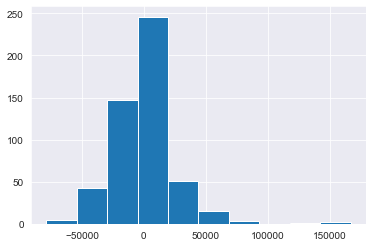

In [348]:
plt.hist(residuals5);

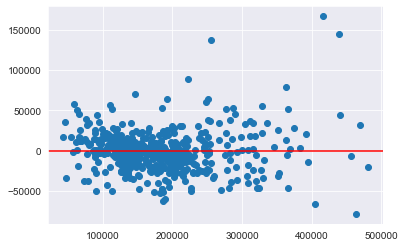

In [349]:
plt.scatter(preds5, residuals5)
plt.axhline(0, color='r');

In [350]:
lasso_coefs = pd.Series(lasso.coef_, index=X5.columns)

<AxesSubplot:>

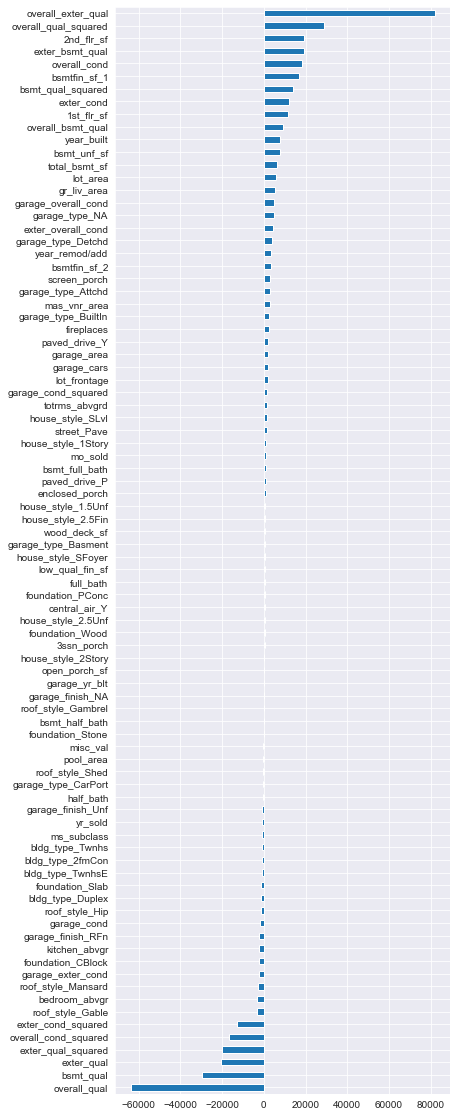

In [351]:
plt.figure(figsize=(6,20))
lasso_coefs[lasso_coefs != 0].sort_values().plot.barh()  # how can I translate this to project

In [352]:
test5_features = ss.transform(test_df2[features5])
kaggle_preds5 = lasso.predict(test5_features)

In [353]:
test_df2['saleprice'] = kaggle_preds5

In [354]:
test_df2.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,...,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,overall_exter_qual,overall_bsmt_qual,exter_bsmt_qual,overall_qual_squared,exter_qual_squared,bsmt_qual_squared,garage_exter_cond,garage_overall_cond,exter_overall_cond,garage_cond_squared,exter_cond_squared,overall_cond_squared,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,...,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,18,12,6,36,9,4,2,8,16,1,4,64,123742.837097
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,...,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,15,20,12,25,9,16,9,12,12,9,9,16,154512.314377


In [355]:
kaggle5 = test_df2[['id', 'saleprice']]

In [356]:
kaggle5.to_csv('./datasets/kaggle5_sub.csv', index=False)

**Scored same as model 4 or kaggle.  Slightly lower cross-val score**

---